# Wai Yu Amanda, Ng
## Student number: 1008217350
## UTORid: ngwai11
## email: waiyuamanda.ng@mail.utoronto.ca

We will first import necessary packages and set a seed to produce consistent result after re-running the codes. 

In [1]:
# Import packages
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt; 
from scipy.stats import bernoulli; import random

# Set seed
random.seed(365)

For coding purposes, we will name "Red" as game 0, "Blue" as game 1 and "Other" as game 2. Let us set the true probability of winning in:
- "Red" as 0.35
- "Blue" as 0.45
- "Other" as 0.6

In [2]:
# True probability of winning for each game
theta_games = [0.35, 0.45, 0.6]

We define a plotting function to plot the beta prior distributions of each game at step 1, 100, 250, 500, 750, 1000.

In [3]:
# Define plotting functions
# Iterations to plot
plots = [1, 100, 250, 500,750, 1000]

# Function to plot the priors for the current step.
def plot(priors, step, ax):
    parameter_domain = np.linspace(0.001, .999, 100)
    for prior in priors:
        y = prior.pdf(parameter_domain)
        p = ax.plot(parameter_domain, y)
    ax.set_title(f'Beta prior distributions at step {step:d}')

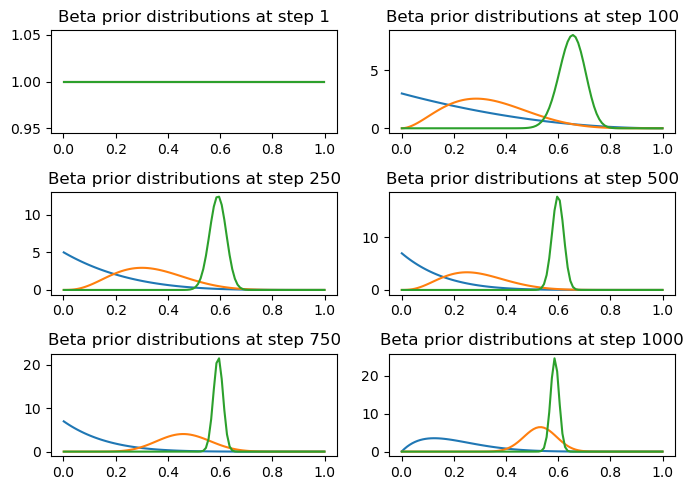

In [4]:
# Setup the plots so that they will look neat
fig, axs = plt.subplots(3, 2, figsize=(7, 5))
axs = axs.flat

# Simulate multi-armed bandit process and update posteriors

# Initially, each game has 0 trials and success
trials = [0, 0, 0]  # Number of times we tried for each game
success = [0, 0, 0]  # Number of successes for each game

# Run the simulation 1000 times, i.e. we play 1000 games.
n = 1000

for step in range(1, n+1):
    # Beta distribution prior based on current observations
    # At the inital step, we set up beta distribution with parameter (1,1) so that it is a uniform distribution
    # Then, all games have the same probability (non-informative prior)
    games_priors = [
        stats.beta(a=1+s, b=1+t-s) for t, s in zip(trials, success)]
    
    # plot prior 
    if step in plots:
        plot(games_priors, step, next(axs))
        
    # Sampling theta values from the posterior distribution 
    # This demonstrates the exploration component in the algorithm
    theta_samples = [
        d.rvs(1) for d in games_priors
    ]
    # Choose the game with highest probability of success (theta) by comparing the values of each triplet
    # This demonstrates the exploitation component in the algorithm
    chosen_games = np.argmax(theta_samples)
    
    # Pull the chosen game and obtain and a result of success/fail in this game.
    # The "result of success/ fail" data will be simulated using bernoulli models 
    # with parameters pre-specified in theta_games in the beginning. 
    # This function returns 1 if success and 0 otherwise.
    x = bernoulli.rvs(theta_games[chosen_games], size=1)
    
    # Update trials and success (which determines the posterior and hence prior for the next step)
    trials[chosen_games] += 1
    success[chosen_games] += x
    
plt.tight_layout()
plt.show()

As shown above, we have the plots of prior distirbutions for each game. 
The blue lines denote prior distirbutions of Game0 (i.e. "Red").
The orange lines denote prior distirbutions of Game1 (i.e. "Blue ).
The green lines denote prior distirbutions of Game2 (i.e. "Other").

# What's the data? 

The data is success/fail of games pulled. This was done by first sampling a theta (probability of success) from the prior of each game and then pulled the game with the highest sampled theta to produce a success/fail outcome using a bernoulli model with probability defined as the sampled theta.


# What's the update for the posterior in question? 

In lecture, we shown that a beta-binomial bayesian model produces a beta posterior distribution as well. 
The update for the posterior is done through updating number of trials and success for each game which determines the parameters in the posterior distribution (alpha and beta)



In [5]:
for i in range(3):
    print((f'Game{i} was pulled {trials[i]:d} times.'))

Game0 was pulled 8 times.
Game1 was pulled 64 times.
Game2 was pulled 928 times.


# Which one of the three choices will you try out? 

We will try out "Other" (i.e. game 2).

# How will you choose?
## What can you learn by repeatedly sampling values from the posterior distribution while comparing the values of each triplet? 

We notice that in 1000 simulations, "Other" (i.e. game 2) has the largest number of trials. In repeatedly sampling theta values from the posterior distribution while comparing the values of each triplet, theta values from "Others" are always the maximum among the triplet, which is shown by its largest number of trials. Thereby, we learn that "Other" game probably has a higher probability of success (theta) than other two games. 

## If you know the chances that A, B, and C are the best choice, how could you balance exploration versus exploitation when choosing which of the possible options to collect the next data point on next?
 
For each game, we sampled a theta (probability of success) from the prior (exploration) and pulled the game with the highest sampled theta (exploitation). We started with the prior Beta(1,1), which corresponds to a uniform prior between 0 and 1, hence the algorithm begins with a non-informative prior. The simulation to generate data is simulated for 1000 steps. Each data was used to update the posterior which serves as the prior for the next step. The algorithm converges to select the game with the highest probability of winning (Game2).